In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print("Libraries imported.")
print(tf.__version__)

Libraries imported.
2.3.1


In [3]:
path = "../input/toshima-data/toshimaku_cleaned_data.csv"

toshima_data = pd.read_csv(path, index_col=0)
toshima_data.dtypes

City,Town,Ward,Village                 object
Area                                   object
Nearest stationFName                  object
Nearest stationFDistance(minute)       int64
Layout                                 object
Area(m^2)                               int64
Year of construction                    int64
Building structure                     object
Use                                    object
City Planning                          object
Maximus Building Coverage Ratio(%)    float64
Maximus Floor-area Ratio(%)           float64
Transaction period                     object
Renovation                             object
Building Age                            int64
Transaction-price(total)              float64
dtype: object

In [4]:
attributes_list = ["Transaction-price(total)","Nearest stationFDistance(minute)","Area(m^2)","Maximus Building Coverage Ratio(%)","Maximus Floor-area Ratio(%)","Building Age"]

In [5]:
dataset = toshima_data[attributes_list].copy()
dataset.head()

,Transaction-price(total),Nearest stationFDistance(minute),Area(m^2),Maximus Building Coverage Ratio(%),Maximus Floor-area Ratio(%),Building Age
0,12000000.0,8,15,80.0,600.0,35
1,17000000.0,11,20,80.0,400.0,10
2,29000000.0,9,20,80.0,500.0,8
3,14000000.0,10,20,80.0,400.0,16
4,18000000.0,11,20,80.0,400.0,10


In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


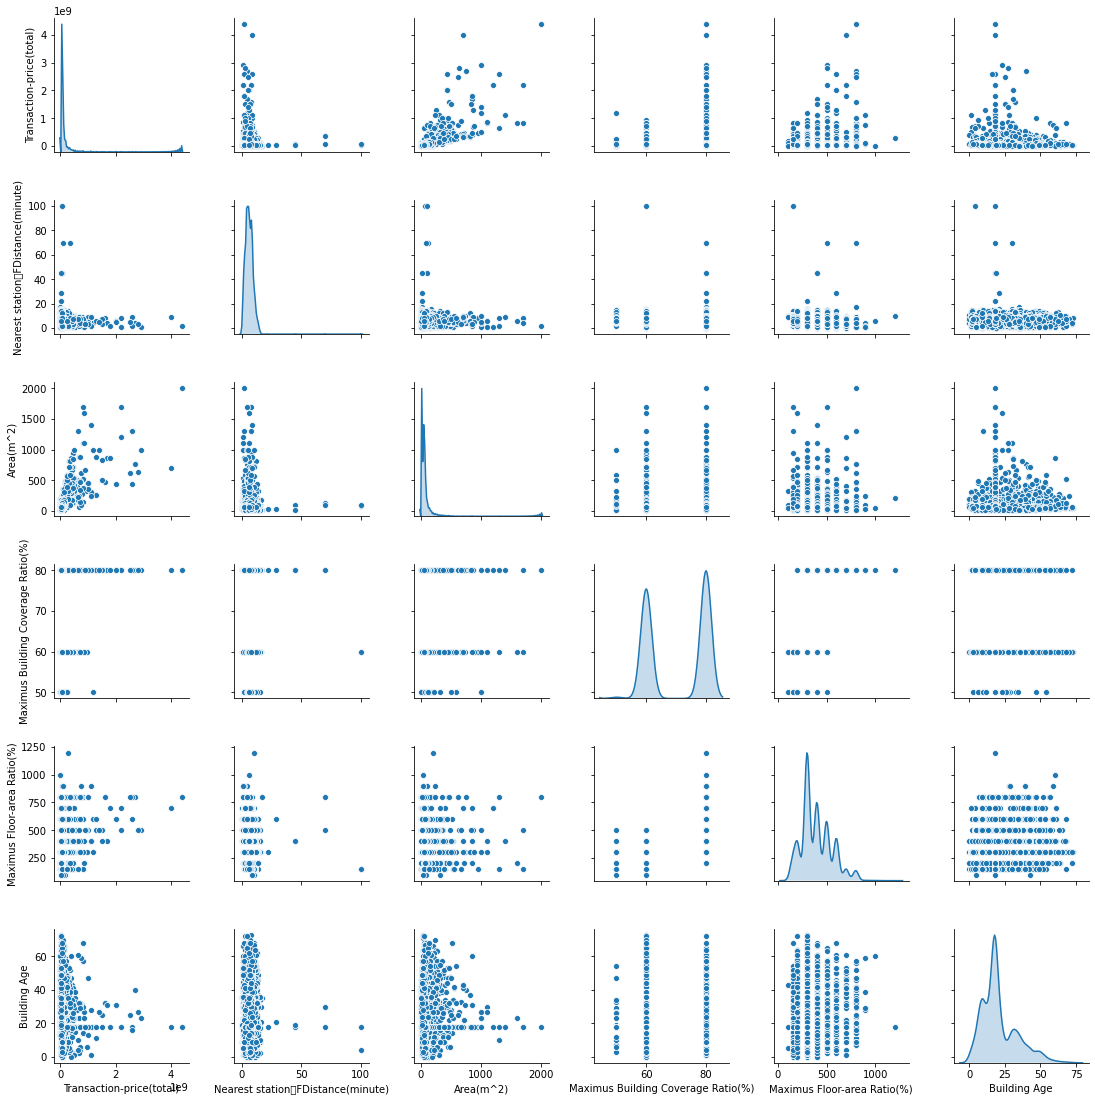

In [7]:
sns.pairplot(train_dataset[["Transaction-price(total)","Nearest stationFDistance(minute)","Area(m^2)","Maximus Building Coverage Ratio(%)","Maximus Floor-area Ratio(%)","Building Age"]], diag_kind="kde")

In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("Transaction-price(total)")
test_labels = test_features.pop("Transaction-price(total)")

In [9]:
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
Transaction-price(total),5.991753e+07,1.551565e+08
Nearest stationFDistance(minute),6.287446e+00,3.702038e+00
Area(m^2),7.094391e+01,1.001614e+02
Maximus Building Coverage Ratio(%),7.065879e+01,1.005816e+01
Maximus Floor-area Ratio(%),3.932489e+02,1.525587e+02
Building Age,2.104180e+01,1.235703e+01


In [10]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[  6.2874455  70.94391    70.65879   393.2489     21.041796 ]


In [11]:
# predict price from building age

building_age = np.array(train_features["Building Age"])
building_age_norm = preprocessing.Normalization(input_shape=[1,])
building_age_norm.adapt(building_age)

building_age_model = tf.keras.Sequential([
    building_age_norm,
    layers.Dense(units=1)
])

building_age_model.summary()

building_age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = building_age_model.fit(
    train_features['Building Age'], train_labels,
    epochs=1000,
    verbose=1,
    # calculate validation results on 20% of the training data
    validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Epoch 1/1000
161/161 [==============================] - 1s 4ms/step - loss: 59824980.0000 - val_loss: 60287440.0000
Epoch 2/1000
161/161 [==============================] - 0s 2ms/step - loss: 59824952.0000 - val_loss: 60287420.0000
Epoch 3/1000
161/161 [==============================] - 0s 2ms/step - loss: 59824948.0000 - val_loss: 60287396.0000
Epoch 4/1000
161/161 [==============================] - 0s 2ms/step - loss: 59824924.0000 - val_loss: 60287372.0000
Epoch 5/1000
161/161 [==============================] - 0s 2

Epoch 66/1000
161/161 [==============================] - 0s 3ms/step - loss: 59823916.0000 - val_loss: 60286384.0000
Epoch 67/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823892.0000 - val_loss: 60286352.0000
Epoch 68/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823892.0000 - val_loss: 60286340.0000
Epoch 69/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823864.0000 - val_loss: 60286332.0000
Epoch 70/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823892.0000 - val_loss: 60286316.0000
Epoch 71/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823848.0000 - val_loss: 60286300.0000
Epoch 72/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823820.0000 - val_loss: 60286284.0000
Epoch 73/1000
161/161 [==============================] - 0s 2ms/step - loss: 59823808.0000 - val_loss: 60286264.0000
Epoch 74/1000
161/161 [==============================] - 0s 2ms/

161/161 [==============================] - 0s 2ms/step - loss: 59822804.0000 - val_loss: 60285272.0000
Epoch 136/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822796.0000 - val_loss: 60285252.0000
Epoch 137/1000
161/161 [==============================] - 0s 3ms/step - loss: 59822764.0000 - val_loss: 60285232.0000
Epoch 138/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822764.0000 - val_loss: 60285216.0000
Epoch 139/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822732.0000 - val_loss: 60285196.0000
Epoch 140/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822732.0000 - val_loss: 60285188.0000
Epoch 141/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822708.0000 - val_loss: 60285184.0000
Epoch 142/1000
161/161 [==============================] - 0s 2ms/step - loss: 59822712.0000 - val_loss: 60285164.0000
Epoch 143/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59821720.0000 - val_loss: 60284164.0000
Epoch 205/1000
161/161 [==============================] - 0s 2ms/step - loss: 59821716.0000 - val_loss: 60284152.0000
Epoch 206/1000
161/161 [==============================] - 0s 3ms/step - loss: 59821656.0000 - val_loss: 60284140.0000
Epoch 207/1000
161/161 [==============================] - 0s 3ms/step - loss: 59821668.0000 - val_loss: 60284120.0000
Epoch 208/1000
161/161 [==============================] - 0s 2ms/step - loss: 59821652.0000 - val_loss: 60284100.0000
Epoch 209/1000
161/161 [==============================] - 0s 2ms/step - loss: 59821632.0000 - val_loss: 60284076.0000
Epoch 210/1000
161/161 [==============================] - 0s 2ms/step - loss: 59821592.0000 - val_loss: 60284056.0000
Epoch 211/1000
161/161 [==============================] - 0s 2ms/step - loss: 59821568.0000 - val_loss: 60284036.0000
Epoch 212/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 1s 3ms/step - loss: 59820588.0000 - val_loss: 60283032.0000
Epoch 274/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820580.0000 - val_loss: 60283020.0000
Epoch 275/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820560.0000 - val_loss: 60283008.0000
Epoch 276/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820544.0000 - val_loss: 60283000.0000
Epoch 277/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820516.0000 - val_loss: 60282980.0000
Epoch 278/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820500.0000 - val_loss: 60282964.0000
Epoch 279/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820484.0000 - val_loss: 60282944.0000
Epoch 280/1000
161/161 [==============================] - 0s 2ms/step - loss: 59820472.0000 - val_loss: 60282932.0000
Epoch 281/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59819492.0000 - val_loss: 60281940.0000
Epoch 343/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819468.0000 - val_loss: 60281912.0000
Epoch 344/1000
161/161 [==============================] - 0s 3ms/step - loss: 59819440.0000 - val_loss: 60281900.0000
Epoch 345/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819428.0000 - val_loss: 60281876.0000
Epoch 346/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819396.0000 - val_loss: 60281868.0000
Epoch 347/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819396.0000 - val_loss: 60281864.0000
Epoch 348/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819376.0000 - val_loss: 60281848.0000
Epoch 349/1000
161/161 [==============================] - 0s 2ms/step - loss: 59819392.0000 - val_loss: 60281836.0000
Epoch 350/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 1s 3ms/step - loss: 59818348.0000 - val_loss: 60280832.0000
Epoch 412/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818340.0000 - val_loss: 60280812.0000
Epoch 413/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818336.0000 - val_loss: 60280808.0000
Epoch 414/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818308.0000 - val_loss: 60280780.0000
Epoch 415/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818304.0000 - val_loss: 60280764.0000
Epoch 416/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818296.0000 - val_loss: 60280736.0000
Epoch 417/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818276.0000 - val_loss: 60280716.0000
Epoch 418/1000
161/161 [==============================] - 0s 2ms/step - loss: 59818252.0000 - val_loss: 60280704.0000
Epoch 419/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 1s 3ms/step - loss: 59817252.0000 - val_loss: 60279700.0000
Epoch 481/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817244.0000 - val_loss: 60279692.0000
Epoch 482/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817240.0000 - val_loss: 60279680.0000
Epoch 483/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817196.0000 - val_loss: 60279660.0000
Epoch 484/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817180.0000 - val_loss: 60279648.0000
Epoch 485/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817168.0000 - val_loss: 60279628.0000
Epoch 486/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817136.0000 - val_loss: 60279612.0000
Epoch 487/1000
161/161 [==============================] - 0s 2ms/step - loss: 59817156.0000 - val_loss: 60279600.0000
Epoch 488/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59816164.0000 - val_loss: 60278604.0000
Epoch 550/1000
161/161 [==============================] - 0s 2ms/step - loss: 59816140.0000 - val_loss: 60278588.0000
Epoch 551/1000
161/161 [==============================] - 0s 3ms/step - loss: 59816120.0000 - val_loss: 60278568.0000
Epoch 552/1000
161/161 [==============================] - 0s 3ms/step - loss: 59816100.0000 - val_loss: 60278548.0000
Epoch 553/1000
161/161 [==============================] - 0s 2ms/step - loss: 59816076.0000 - val_loss: 60278536.0000
Epoch 554/1000
161/161 [==============================] - 0s 2ms/step - loss: 59816076.0000 - val_loss: 60278528.0000
Epoch 555/1000
161/161 [==============================] - 0s 2ms/step - loss: 59816036.0000 - val_loss: 60278516.0000
Epoch 556/1000
161/161 [==============================] - 0s 2ms/step - loss: 59816012.0000 - val_loss: 60278504.0000
Epoch 557/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 3ms/step - loss: 59815032.0000 - val_loss: 60277504.0000
Epoch 619/1000
161/161 [==============================] - 0s 2ms/step - loss: 59815024.0000 - val_loss: 60277488.0000
Epoch 620/1000
161/161 [==============================] - 0s 2ms/step - loss: 59815000.0000 - val_loss: 60277480.0000
Epoch 621/1000
161/161 [==============================] - 0s 2ms/step - loss: 59815004.0000 - val_loss: 60277456.0000
Epoch 622/1000
161/161 [==============================] - 0s 2ms/step - loss: 59814972.0000 - val_loss: 60277440.0000
Epoch 623/1000
161/161 [==============================] - 0s 2ms/step - loss: 59814960.0000 - val_loss: 60277404.0000
Epoch 624/1000
161/161 [==============================] - 0s 2ms/step - loss: 59814948.0000 - val_loss: 60277392.0000
Epoch 625/1000
161/161 [==============================] - 0s 2ms/step - loss: 59814916.0000 - val_loss: 60277380.0000
Epoch 626/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 3ms/step - loss: 59813916.0000 - val_loss: 60276380.0000
Epoch 688/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813912.0000 - val_loss: 60276368.0000
Epoch 689/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813928.0000 - val_loss: 60276356.0000
Epoch 690/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813884.0000 - val_loss: 60276348.0000
Epoch 691/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813892.0000 - val_loss: 60276336.0000
Epoch 692/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813832.0000 - val_loss: 60276308.0000
Epoch 693/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813820.0000 - val_loss: 60276292.0000
Epoch 694/1000
161/161 [==============================] - 0s 2ms/step - loss: 59813820.0000 - val_loss: 60276280.0000
Epoch 695/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59812828.0000 - val_loss: 60275284.0000
Epoch 757/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812816.0000 - val_loss: 60275268.0000
Epoch 758/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812792.0000 - val_loss: 60275256.0000
Epoch 759/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812744.0000 - val_loss: 60275228.0000
Epoch 760/1000
161/161 [==============================] - 1s 3ms/step - loss: 59812752.0000 - val_loss: 60275216.0000
Epoch 761/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812744.0000 - val_loss: 60275208.0000
Epoch 762/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812752.0000 - val_loss: 60275204.0000
Epoch 763/1000
161/161 [==============================] - 0s 2ms/step - loss: 59812732.0000 - val_loss: 60275184.0000
Epoch 764/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 1s 3ms/step - loss: 59811720.0000 - val_loss: 60274184.0000
Epoch 826/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811700.0000 - val_loss: 60274180.0000
Epoch 827/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811684.0000 - val_loss: 60274160.0000
Epoch 828/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811676.0000 - val_loss: 60274140.0000
Epoch 829/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811668.0000 - val_loss: 60274120.0000
Epoch 830/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811636.0000 - val_loss: 60274104.0000
Epoch 831/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811636.0000 - val_loss: 60274064.0000
Epoch 832/1000
161/161 [==============================] - 0s 2ms/step - loss: 59811608.0000 - val_loss: 60274060.0000
Epoch 833/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59810624.0000 - val_loss: 60273072.0000
Epoch 895/1000
161/161 [==============================] - 1s 3ms/step - loss: 59810620.0000 - val_loss: 60273048.0000
Epoch 896/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810568.0000 - val_loss: 60273028.0000
Epoch 897/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810568.0000 - val_loss: 60273020.0000
Epoch 898/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810556.0000 - val_loss: 60273004.0000
Epoch 899/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810524.0000 - val_loss: 60272988.0000
Epoch 900/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810500.0000 - val_loss: 60272972.0000
Epoch 901/1000
161/161 [==============================] - 0s 2ms/step - loss: 59810524.0000 - val_loss: 60272952.0000
Epoch 902/1000
161/161 [==============================] - 0s 2ms/step -

161/161 [==============================] - 0s 2ms/step - loss: 59809520.0000 - val_loss: 60271964.0000
Epoch 964/1000
161/161 [==============================] - 0s 3ms/step - loss: 59809480.0000 - val_loss: 60271948.0000
Epoch 965/1000
161/161 [==============================] - 0s 3ms/step - loss: 59809460.0000 - val_loss: 60271928.0000
Epoch 966/1000
161/161 [==============================] - 0s 2ms/step - loss: 59809468.0000 - val_loss: 60271908.0000
Epoch 967/1000
161/161 [==============================] - 0s 2ms/step - loss: 59809448.0000 - val_loss: 60271888.0000
Epoch 968/1000
161/161 [==============================] - 0s 2ms/step - loss: 59809416.0000 - val_loss: 60271876.0000
Epoch 969/1000
161/161 [==============================] - 0s 2ms/step - loss: 59809412.0000 - val_loss: 60271872.0000
Epoch 970/1000
161/161 [==============================] - 0s 3ms/step - loss: 59809384.0000 - val_loss: 60271856.0000
Epoch 971/1000
161/161 [==============================] - 0s 3ms/step -

In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

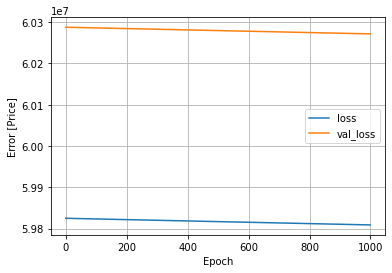

In [15]:
plot_loss(history)

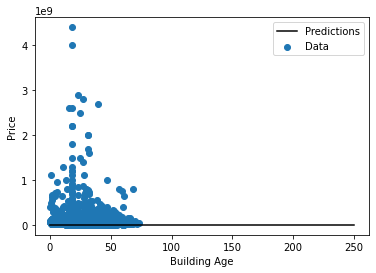

In [17]:
x = tf.linspace(0.0, 250, 251)
y = building_age_model.predict(x)

def plot_building_age(x, y):
  plt.scatter(train_features['Building Age'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Building Age')
  plt.ylabel('Price')
  plt.legend()

plot_building_age(x, y)

In [18]:
# predict price from area m^2

area = np.array(train_features["Area(m^2)"])
area_norm = preprocessing.Normalization(input_shape=[1,])
area_norm.adapt(building_age)

area_model = tf.keras.Sequential([
    area_norm,
    layers.Dense(units=1)
])

area_model.summary()

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

area_history = area_model.fit(
    train_features['Area(m^2)'], train_labels,
    epochs=500,
    verbose=1,
    # calculate validation results on 20% of the training data
    validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Epoch 1/500
161/161 [==============================] - 0s 2ms/step - loss: 59824952.0000 - val_loss: 60287352.0000
Epoch 2/500
161/161 [==============================] - 0s 2ms/step - loss: 59824864.0000 - val_loss: 60287300.0000
Epoch 3/500
161/161 [==============================] - 0s 2ms/step - loss: 59824796.0000 - val_loss: 60287216.0000
Epoch 4/500
161/161 [==============================] - 0s 2ms/step - loss: 59824688.0000 - val_loss: 60287140.0000
Epoch 5/500
161/161 [==============================] - 0s 2ms/

161/161 [==============================] - 0s 2ms/step - loss: 59819892.0000 - val_loss: 60282480.0000
Epoch 67/500
161/161 [==============================] - 0s 2ms/step - loss: 59819816.0000 - val_loss: 60282396.0000
Epoch 68/500
161/161 [==============================] - 0s 3ms/step - loss: 59819728.0000 - val_loss: 60282328.0000
Epoch 69/500
161/161 [==============================] - 1s 3ms/step - loss: 59819660.0000 - val_loss: 60282256.0000
Epoch 70/500
161/161 [==============================] - 0s 2ms/step - loss: 59819568.0000 - val_loss: 60282168.0000
Epoch 71/500
161/161 [==============================] - 0s 2ms/step - loss: 59819504.0000 - val_loss: 60282096.0000
Epoch 72/500
161/161 [==============================] - 0s 2ms/step - loss: 59819436.0000 - val_loss: 60282016.0000
Epoch 73/500
161/161 [==============================] - 0s 2ms/step - loss: 59819328.0000 - val_loss: 60281944.0000
Epoch 74/500
161/161 [==============================] - 0s 2ms/step - loss: 59819268.

161/161 [==============================] - 0s 2ms/step - loss: 59814464.0000 - val_loss: 60277192.0000
Epoch 137/500
161/161 [==============================] - 0s 2ms/step - loss: 59814400.0000 - val_loss: 60277132.0000
Epoch 138/500
161/161 [==============================] - 0s 2ms/step - loss: 59814316.0000 - val_loss: 60277040.0000
Epoch 139/500
161/161 [==============================] - 0s 2ms/step - loss: 59814252.0000 - val_loss: 60276964.0000
Epoch 140/500
161/161 [==============================] - 0s 2ms/step - loss: 59814152.0000 - val_loss: 60276900.0000
Epoch 141/500
161/161 [==============================] - 0s 2ms/step - loss: 59814056.0000 - val_loss: 60276812.0000
Epoch 142/500
161/161 [==============================] - 0s 2ms/step - loss: 59814000.0000 - val_loss: 60276748.0000
Epoch 143/500
161/161 [==============================] - 0s 2ms/step - loss: 59813916.0000 - val_loss: 60276668.0000
Epoch 144/500
161/161 [==============================] - 0s 2ms/step - loss: 5

161/161 [==============================] - 0s 2ms/step - loss: 59808996.0000 - val_loss: 60271920.0000
Epoch 207/500
161/161 [==============================] - 0s 2ms/step - loss: 59808944.0000 - val_loss: 60271844.0000
Epoch 208/500
161/161 [==============================] - 0s 2ms/step - loss: 59808848.0000 - val_loss: 60271776.0000
Epoch 209/500
161/161 [==============================] - 0s 2ms/step - loss: 59808756.0000 - val_loss: 60271684.0000
Epoch 210/500
161/161 [==============================] - 0s 2ms/step - loss: 59808696.0000 - val_loss: 60271616.0000
Epoch 211/500
161/161 [==============================] - 0s 2ms/step - loss: 59808608.0000 - val_loss: 60271548.0000
Epoch 212/500
161/161 [==============================] - 0s 2ms/step - loss: 59808540.0000 - val_loss: 60271464.0000
Epoch 213/500
161/161 [==============================] - 0s 2ms/step - loss: 59808444.0000 - val_loss: 60271388.0000
Epoch 214/500
161/161 [==============================] - 0s 2ms/step - loss: 5

161/161 [==============================] - 0s 2ms/step - loss: 59803572.0000 - val_loss: 60266644.0000
Epoch 277/500
161/161 [==============================] - 0s 2ms/step - loss: 59803492.0000 - val_loss: 60266560.0000
Epoch 278/500
161/161 [==============================] - 0s 2ms/step - loss: 59803400.0000 - val_loss: 60266488.0000
Epoch 279/500
161/161 [==============================] - 0s 2ms/step - loss: 59803344.0000 - val_loss: 60266420.0000
Epoch 280/500
161/161 [==============================] - 0s 2ms/step - loss: 59803260.0000 - val_loss: 60266344.0000
Epoch 281/500
161/161 [==============================] - 0s 2ms/step - loss: 59803172.0000 - val_loss: 60266268.0000
Epoch 282/500
161/161 [==============================] - 0s 2ms/step - loss: 59803096.0000 - val_loss: 60266184.0000
Epoch 283/500
161/161 [==============================] - 0s 2ms/step - loss: 59803020.0000 - val_loss: 60266100.0000
Epoch 284/500
161/161 [==============================] - 0s 2ms/step - loss: 5

161/161 [==============================] - 0s 2ms/step - loss: 59798124.0000 - val_loss: 60261356.0000
Epoch 347/500
161/161 [==============================] - 0s 2ms/step - loss: 59798048.0000 - val_loss: 60261288.0000
Epoch 348/500
161/161 [==============================] - 0s 2ms/step - loss: 59797972.0000 - val_loss: 60261212.0000
Epoch 349/500
161/161 [==============================] - 0s 2ms/step - loss: 59797888.0000 - val_loss: 60261136.0000
Epoch 350/500
161/161 [==============================] - 0s 2ms/step - loss: 59797800.0000 - val_loss: 60261056.0000
Epoch 351/500
161/161 [==============================] - 0s 2ms/step - loss: 59797736.0000 - val_loss: 60260980.0000
Epoch 352/500
161/161 [==============================] - 0s 2ms/step - loss: 59797660.0000 - val_loss: 60260904.0000
Epoch 353/500
161/161 [==============================] - 0s 2ms/step - loss: 59797576.0000 - val_loss: 60260836.0000
Epoch 354/500
161/161 [==============================] - 0s 2ms/step - loss: 5

161/161 [==============================] - 0s 2ms/step - loss: 59792676.0000 - val_loss: 60256084.0000
Epoch 417/500
161/161 [==============================] - 0s 2ms/step - loss: 59792624.0000 - val_loss: 60256016.0000
Epoch 418/500
161/161 [==============================] - 0s 2ms/step - loss: 59792512.0000 - val_loss: 60255944.0000
Epoch 419/500
161/161 [==============================] - 0s 2ms/step - loss: 59792436.0000 - val_loss: 60255868.0000
Epoch 420/500
161/161 [==============================] - 0s 2ms/step - loss: 59792364.0000 - val_loss: 60255792.0000
Epoch 421/500
161/161 [==============================] - 0s 2ms/step - loss: 59792300.0000 - val_loss: 60255720.0000
Epoch 422/500
161/161 [==============================] - 0s 2ms/step - loss: 59792224.0000 - val_loss: 60255644.0000
Epoch 423/500
161/161 [==============================] - 0s 2ms/step - loss: 59792140.0000 - val_loss: 60255564.0000
Epoch 424/500
161/161 [==============================] - 0s 2ms/step - loss: 5

161/161 [==============================] - 0s 2ms/step - loss: 59787248.0000 - val_loss: 60250816.0000
Epoch 487/500
161/161 [==============================] - 0s 2ms/step - loss: 59787164.0000 - val_loss: 60250736.0000
Epoch 488/500
161/161 [==============================] - 0s 2ms/step - loss: 59787080.0000 - val_loss: 60250660.0000
Epoch 489/500
161/161 [==============================] - 0s 2ms/step - loss: 59787012.0000 - val_loss: 60250588.0000
Epoch 490/500
161/161 [==============================] - 0s 2ms/step - loss: 59786928.0000 - val_loss: 60250508.0000
Epoch 491/500
161/161 [==============================] - 0s 2ms/step - loss: 59786844.0000 - val_loss: 60250444.0000
Epoch 492/500
161/161 [==============================] - 0s 2ms/step - loss: 59786780.0000 - val_loss: 60250360.0000
Epoch 493/500
161/161 [==============================] - 0s 2ms/step - loss: 59786712.0000 - val_loss: 60250292.0000
Epoch 494/500
161/161 [==============================] - 0s 2ms/step - loss: 5